### Data source
[Johns Hopkins Github](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv)
### Reference 
[towardsdatascience]( https://towardsdatascience.com/data-exploration-with-the-covid-tracking-project-d89ac87342bc)          

In [1]:
## Data process
import pandas as pd
#path = "https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
#df=pd.read_csv(path,index_col=False)
df=pd.read_csv('time_series_covid19_confirmed_US.csv', header=0)
df.shape

(3261, 188)

In [2]:
df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '7/7/20', '7/8/20', '7/9/20', '7/10/20', '7/11/20', '7/12/20',
       '7/13/20', '7/14/20', '7/15/20', '7/16/20'],
      dtype='object', length=188)

In [3]:
# subset columns
df=df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2','Country_Region','Lat', 'Long_','Combined_Key'], axis=1)
df.head(3)

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20
0,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,0,0,0,0,0,0,0,0,0,...,303,307,309,310,310,310,312,312,313,314
2,Northern Mariana Islands,0,0,0,0,0,0,0,0,0,...,31,31,31,31,33,33,33,36,36,37


In [4]:
# stack data from wide to long
df.set_index("Province_State",inplace =True)
df=df.stack().reset_index()
df.head(3)

,Province_State,level_1,0
0,American Samoa,1/22/20,0
1,American Samoa,1/23/20,0
2,American Samoa,1/24/20,0


In [5]:
# change data from wide to long
df.rename(columns={'level_1':'date',0:"cases"}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.head(3)

,Province_State,date,cases
0,American Samoa,2020-01-22,0
1,American Samoa,2020-01-23,0
2,American Samoa,2020-01-24,0


## group cases by state

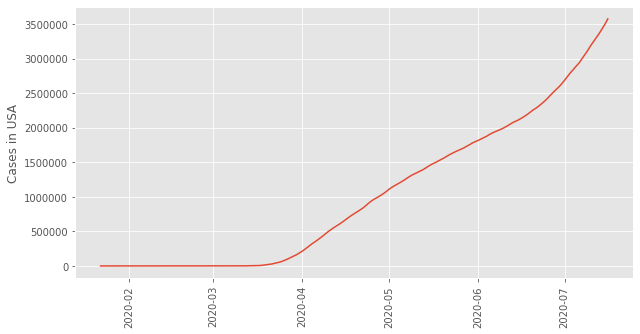

In [6]:
casesByState=df.groupby("date").cases.sum()
casesByState=casesByState.to_frame().reset_index()
casesByState.rename(columns={'cases':'agg_cases'}, inplace=True)

# plot data
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.plot(casesByState.date,casesByState.agg_cases)
plt.xticks(rotation=90)
plt.ylabel("Cases in USA")
plt.show();

## compare Florida with the rest of US 

        date  ISFLUS  cases
0 2020-01-22      FL      0
1 2020-01-22  others      1
2 2020-01-23      FL      0


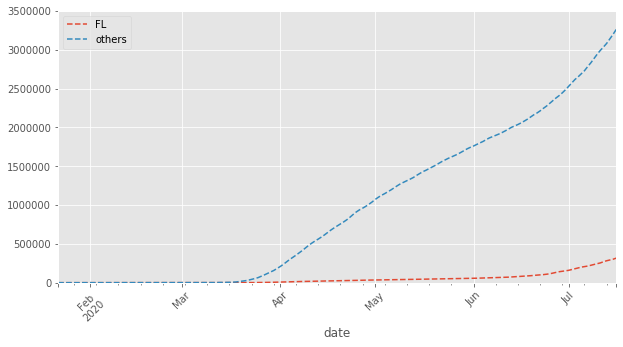

In [7]:
plt.figure(figsize=(10,5))
df['ISFLUS']=df['Province_State'].apply(lambda x: "FL" if x=="Florida" else 'others')
FL_vs_others=df.groupby(["date","ISFLUS"]).cases.sum().reset_index()
print(FL_vs_others.head(3))
#plot
FL_vs_others.set_index('date').groupby('ISFLUS')['cases'].plot(style='--', legend=True,rot=45, ylim=(0,3500000));


## mark the timeline

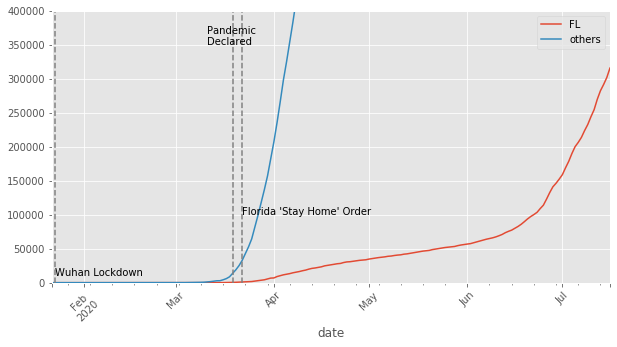

In [8]:
plt.figure(figsize=(10,5))
FL_vs_others.set_index('date').groupby('ISFLUS')['cases'].plot(legend=True,rot=45, ylim=(0,400000));

plt.axvline(x='2020-01-23' , color="grey", linestyle="--");
plt.text('2020-01-23', 10000, "Wuhan Lockdown")

plt.axvline(x='2020-03-19' , color="grey", linestyle="--");
plt.text('2020-03-11', 350000, "Pandemic\nDeclared")

plt.axvline(x='2020-03-22' , color="grey", linestyle="--");
plt.text('2020-03-22', 100000, "Florida 'Stay Home' Order");

## Top hit states as of July 16

           date Province_State   cases
1767 2020-07-16       New York  404775
1761 2020-07-16     California  364706
1762 2020-07-16        Florida  315775
1769 2020-07-16          Texas  305854
1763 2020-07-16       Illinois  159082
1760 2020-07-16        Arizona  134613
1764 2020-07-16  Massachusetts  112581
1768 2020-07-16   Pennsylvania  103075
1765 2020-07-16       Michigan   79839
1766 2020-07-16         Nevada   31915


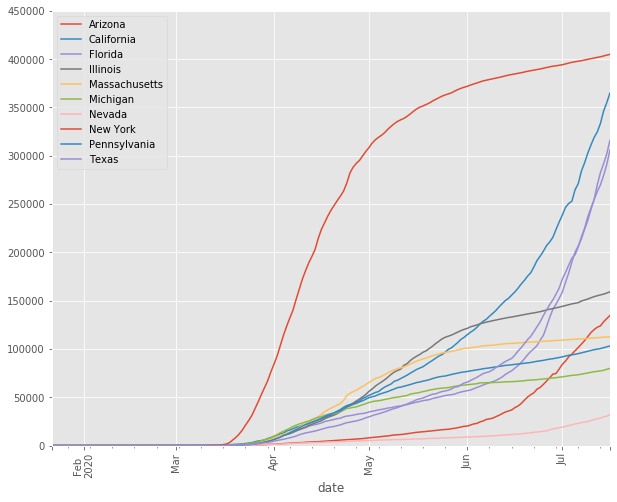

In [9]:
top20=df[df.date=='2020-07-16'].sort_values('cases',ascending=False)['Province_State'].head(20)
dftop20=df[df['Province_State'].isin(top20)]

dftop20=dftop20.groupby(["date","Province_State"]).cases.sum().reset_index()
print(dftop20[dftop20.date=='2020-07-16'].sort_values(by=['cases'],ascending=False))
plt.figure(figsize=(10,8))
dftop20.set_index('date').groupby('Province_State')['cases'].plot(legend=True,rot=90, ylim=(0,450000));

In [10]:
dfFlorida=df[df.Province_State=='Florida'].reset_index(drop=True)
dfFlorida=dfFlorida.drop(columns=['Province_State','ISFLUS' ])
dfFlorida.head(3)

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0


In [11]:
FL_sum_over=dfFlorida.groupby(["date"]).cases.sum().reset_index()
print(FL_sum_over.shape)
FL_sum_over.head()

(177, 2)


,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


Text(0.5, 1.0, 'Time Series of daily cases in Florida')

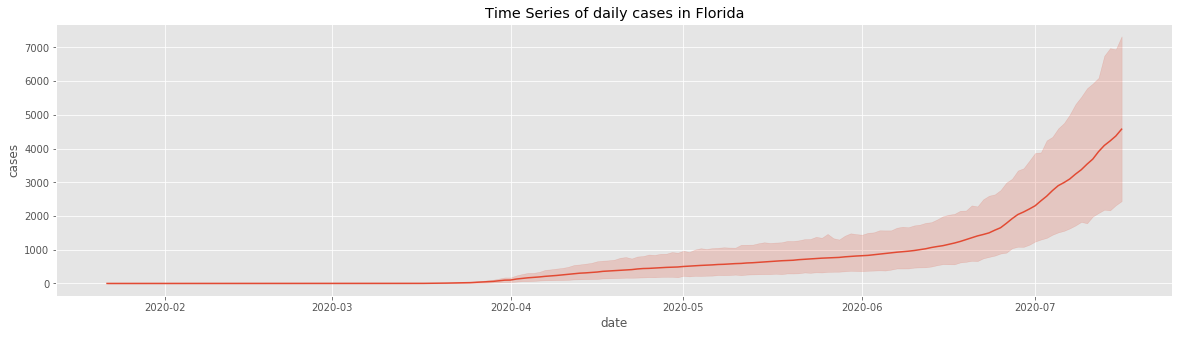

In [12]:
# plot Florda data
import seaborn as sns
plt.figure(figsize=(20,5))
g=sns.lineplot(x='date', y='cases', data=dfFlorida)
g.set_title('Time Series of daily cases in Florida')

Text(0.5, 1.0, 'Time Series of daily cases in Florida')

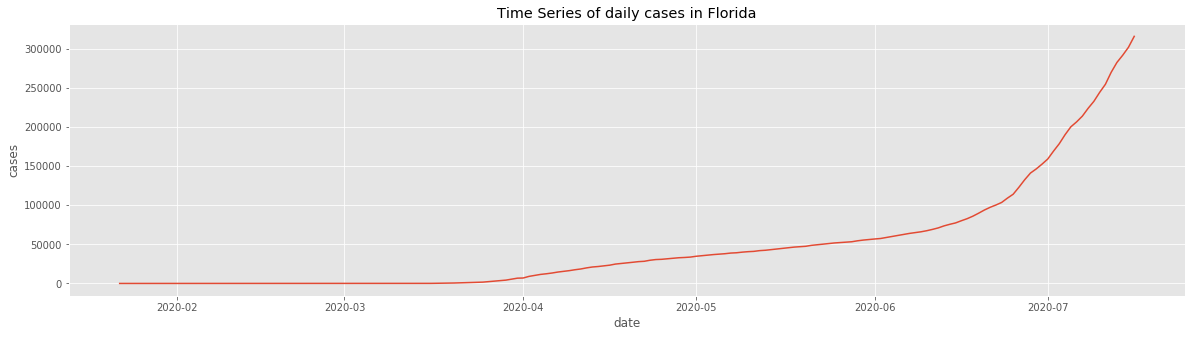

In [13]:
# plot Florda dataFL_sum_over
plt.figure(figsize=(20,5))
g=sns.lineplot(x='date', y='cases', data=FL_sum_over)
g.set_title('Time Series of daily cases in Florida')

### Anomaly detection 

In [14]:
import matplotlib.pyplot as plt
from fbprophet import Prophet
import altair as alt
import plotly 
def fit_predict_model(dataframe, interval_width = 0.99, changepoint_range = 0.8):
    m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
                seasonality_mode = 'multiplicative', 
                interval_width = interval_width,
                changepoint_range = changepoint_range)
    m = m.fit(dataframe)
    forecast = m.predict(dataframe)
    forecast['fact'] = dataframe['y'].reset_index(drop = True)
    return forecast

def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
    #forecast['fact'] = df['y']

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1

    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
    
    return forecasted
    
def plot_anomalies(forecasted):
    interval = alt.Chart(forecasted).mark_area(interpolate="basis", color = '#7FC97F').encode(
    x=alt.X('ds:T',  title ='date'),
    y='yhat_upper',
    y2='yhat_lower',
    tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive().properties(
        title='Anomaly Detection'
    )

    fact = alt.Chart(forecasted[forecasted.anomaly==0]).mark_circle(size=15, opacity=0.7, color = 'Black').encode(
        x='ds:T',
        y=alt.Y('fact', title='Incident_Type_count'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive()

    anomalies = alt.Chart(forecasted[forecasted.anomaly!=0]).mark_circle(size=30, color = 'Red').encode(
        x='ds:T',
        y=alt.Y('fact', title='Incident_Type_count'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper'],
        size = alt.Size( 'importance', legend=None)
    ).interactive()

    return alt.layer(interval, fact, anomalies)\
              .properties(width=870, height=450)\
              .configure_title(fontSize=20)


In [15]:
df0F=FL_sum_over.rename(columns={"date": "ds", "cases": "y"})
pred = fit_predict_model(df0F)
pred = detect_anomalies(pred)
plot_anomalies(pred)

alt.LayerChart(...)

### Predict the next 30 days by fbprophet module

In [16]:
# model
import fbprophet
df_prophet = fbprophet.Prophet()
df_prophet.fit(df0F)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


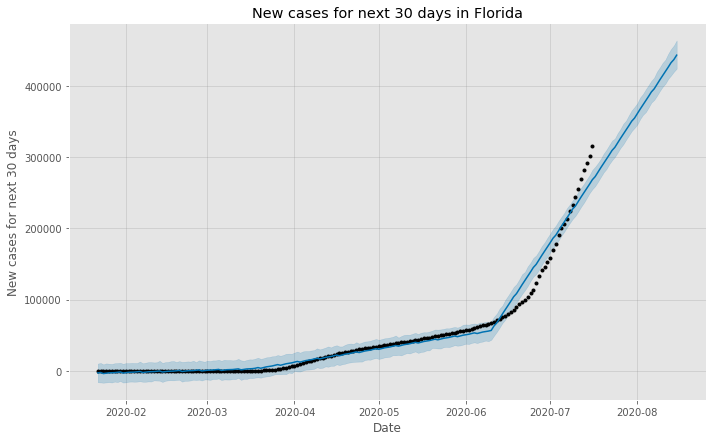

In [17]:
# Make a future dataframe
df_forecast = df_prophet.make_future_dataframe(periods=1*30, freq='D')
# Make predictions
df_forecast = df_prophet.predict(df_forecast)

df_prophet.plot(df_forecast, xlabel = 'Date', ylabel = 'New cases for next 30 days')
plt.title('New cases for next 30 days in Florida');

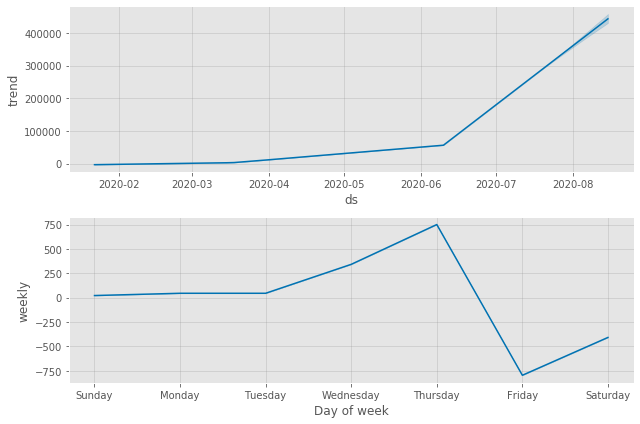

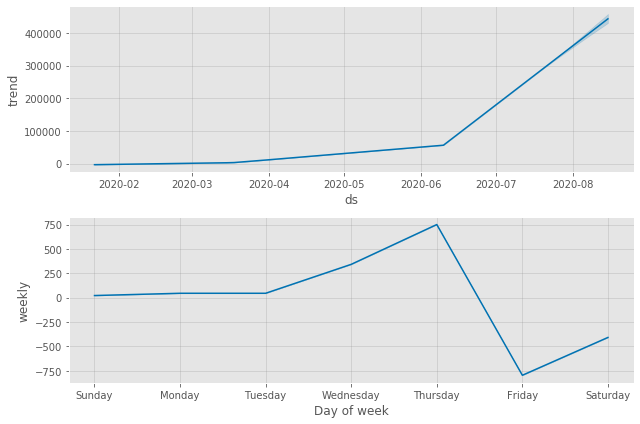

In [18]:
# Plot the trends and patterns
df_prophet.plot_components(df_forecast)

### ARIMA model

In [19]:
# data reading
dfindex=FL_sum_over.set_index('date')
train=dfindex[40:150]
test=dfindex[150:]

In [20]:
train.head()

,cases
date,
2020-03-02,1
2020-03-03,2
2020-03-04,2
2020-03-05,3
2020-03-06,3


In [21]:
test.shape

(27, 1)

In [22]:
#decompose data
import warnings
warnings.simplefilter('ignore');
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
# Multiplicative Decomposition 
#result_mul = seasonal_decompose(train, model='multiplicative', freq=1)
# Additive Decomposition
result_add = seasonal_decompose(train, model='additive', freq=1)

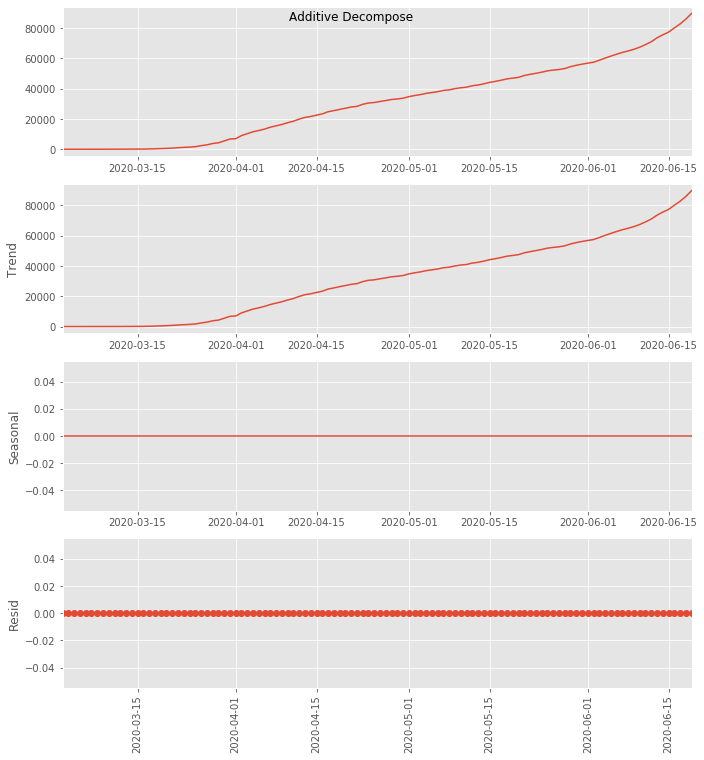

In [23]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
#result_mul.plot().suptitle('Multiplicative Decompose')
#plt.xticks(rotation=90)
result_add.plot().suptitle('Additive Decompose')
plt.xticks(rotation=90)
plt.show()

ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. 
PACF is a partial auto-correlation function. Basically it finds correlation of the residuals with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. 
We should expect our AR process to show gradual decrease in the ACF plot since being an AR process its present has good correlation with the past lags. We expect PACF to have sharp fall after near lags as these lags near to present can capture the variation so well that we don’t need past lags to predict present.

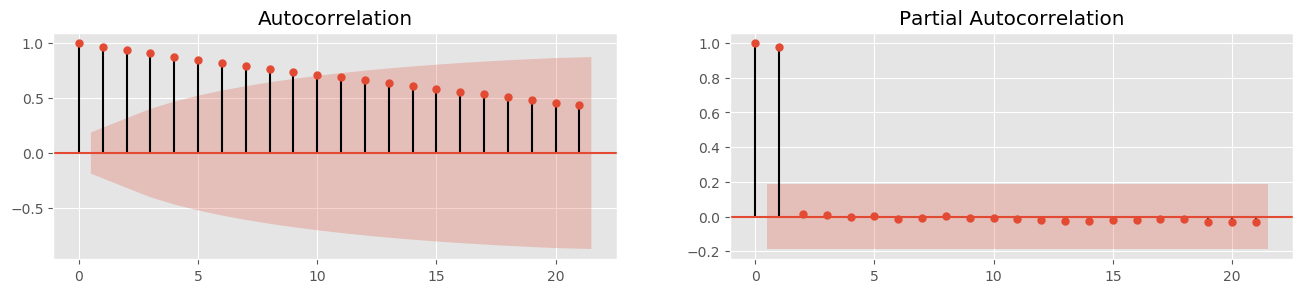

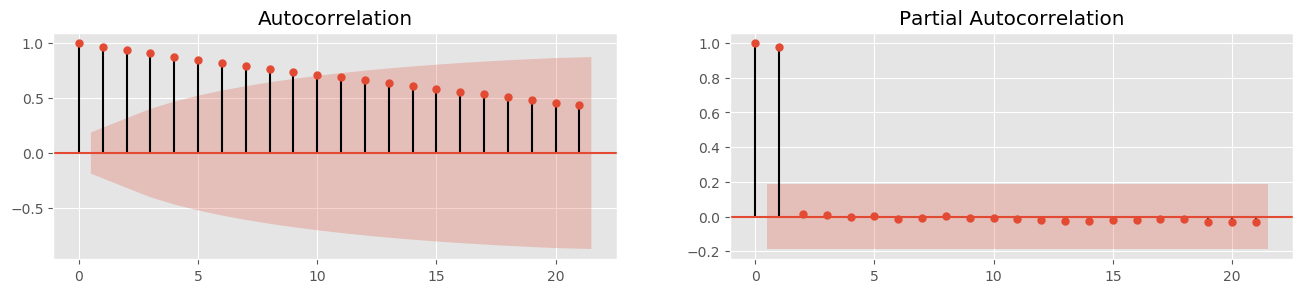

In [24]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(train, ax=axes[0])
plot_pacf(train,  ax=axes[1])

In [25]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [34]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(3, 2, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3153      0.254      1.242      0.214      -0.182       0.813
ar.L2          0.2538      0.145      1.751      0.080      -0.030       0.538
ar.L3          0.3149      0.100      3.155      0.002       0.119       0.511
ma.L1         -0.8434      0.245     -3.443      0.001      -1.324      -0.363
ar.S.L12      -0.3212      0.119     -2.699      0.007      -0.554      -0.088
ma.S.L12      -1.0004      0.175     -5.707      0.000      -1.344      -0.657
sigma2      1.179e+05   1.49e-06   7.93e+10      0.000    1.18e+05    1.18e+05


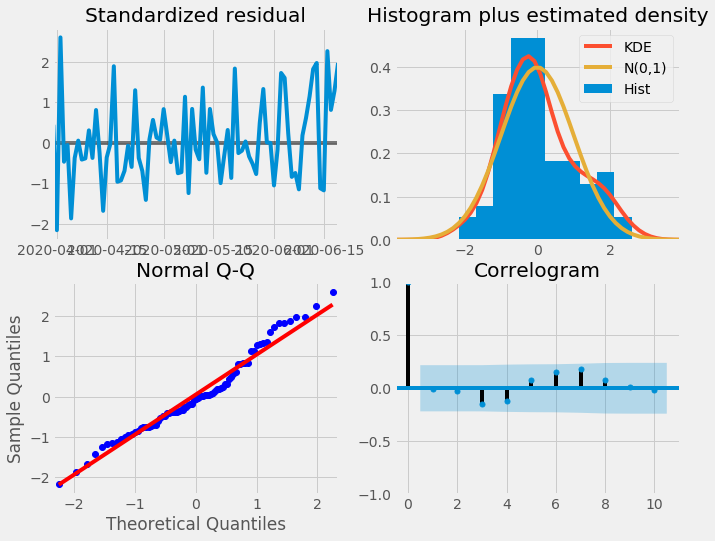

In [35]:
results.plot_diagnostics(figsize=(10, 8))
plt.show()

In [36]:
# Build Model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(3,2,1))  
#model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=False)  
print(fitted.summary())
# Forecast
fc, se, conf = fitted.forecast(27, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

                             ARIMA Model Results                              
Dep. Variable:               D2.cases   No. Observations:                  108
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -781.016
Method:                       css-mle   S.D. of innovations            333.838
Date:                Fri, 17 Jul 2020   AIC                           1574.031
Time:                        19:36:27   BIC                           1590.124
Sample:                    03-04-2020   HQIC                          1580.556
                         - 06-19-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             31.7592     16.107      1.972      0.049       0.189      63.329
ar.L1.D2.cases    -0.2063      0.616     -0.335      0.738      -1.413       1.001
ar.L2.D2.cases    -0.1155      0.371

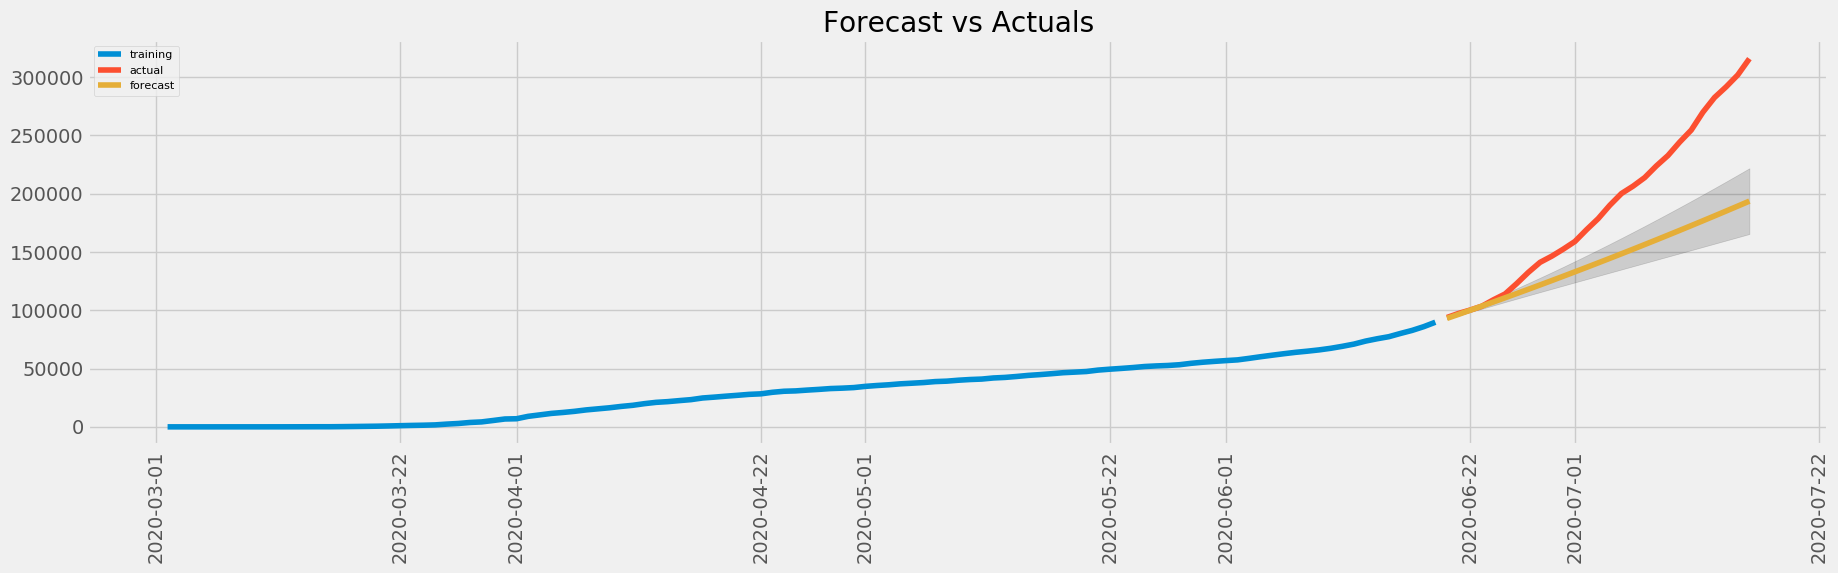

In [37]:
# Plot
plt.figure(figsize=(20,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xticks(rotation=90)
plt.show()

Test MSE: 3511090379.855


<Figure size 216x216 with 0 Axes>

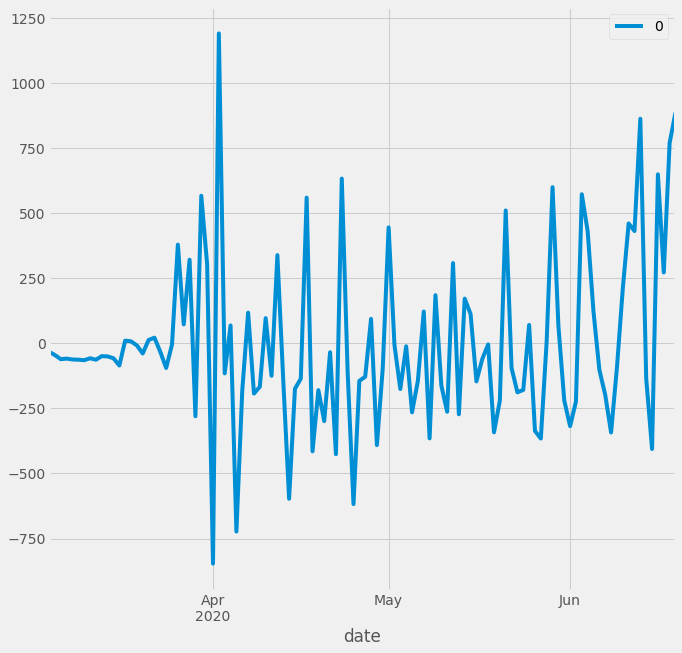

In [40]:
from sklearn.metrics import mean_squared_error
# plot residual errors
from matplotlib import pyplot
error = mean_squared_error(test, fc_series)
print('Test MSE: %.3f' % error)

residuals = pd.DataFrame(fitted.resid)
residuals.plot()
pyplot.show()

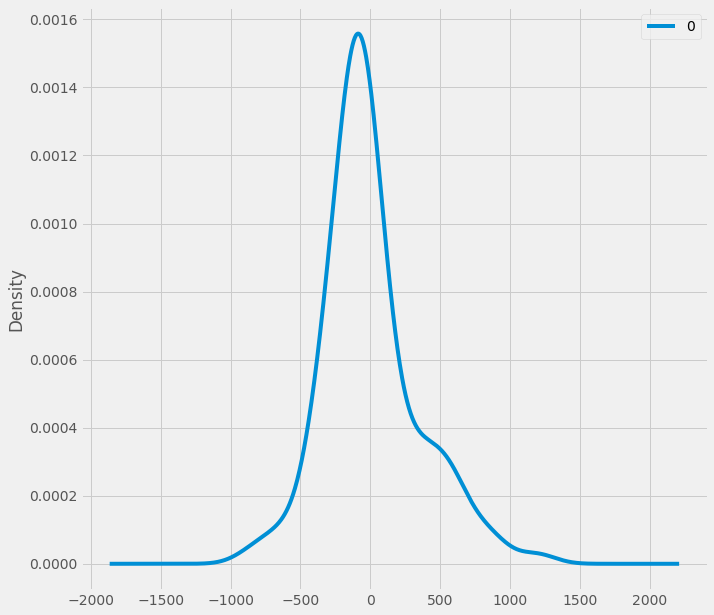

                 0
count   108.000000
mean     -0.394481
std     335.401741
min    -846.147966
25%    -179.310985
50%     -59.534554
75%     113.503125
max    1190.157118


In [33]:
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())